# World Happiness Report (Happiness Score prediction)

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network that includes rankings of national happiness based on a number of variables, including Economy, Family, Health, Freedom to make life decisions, generosity, and perceptions of corruption. The report also examines the statistics and discusses how it may have an impact on policy. The World Happiness Report dataset gives users access to information from reports covering more than 150 nations from 2015 through 2021. It can be used for study and analysis of long-term patterns in global happiness. The dataset includes data on a variety of indicators, including generosity, views of corruption, life expectancy, freedom to make decisions in life, social assistance, GDP per capita, and happiness score. Researchers can learn a lot about this dataset by how different factors impact happiness and inform policy decisions to improve the well-being of people around the world

To predict the Happiness Score of the country will use Linear Regression along with Decesion Tree Regressor, Random Forest Regressor, AdaBoost Regressor, support vector Regressor

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv('happiness_report.csv')

In [8]:
df

Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy   Family   Health  Freedom  \
0              7.587         0.03411  1.39651  1.34951  0.94143  0.66557   
1              7.561         0.04884  1.30232  1.40223  0.94784  0.62877   
2              7.527         0.03328  1.32548  1.36058  0.87464  0.64938   
3              7.522         0.03880  1.45900  1.33095  0.88521  0.66973   
4              7.427         0.03553  1.32629  1.32261  0.90563  0.63297   
..               ...             ...      ...      ...      ...      ...   
153            3.465         0.03464  0.22208  0.77370  0.42864  0.59201   
154            3.340         0.03656  0.28665  0.35386  0.31910  0.48450   
155            3.006         0.05015  0.66320  0.47489  0.72193  0.15684   
156            2.905         0.08658  0.01530  0.41587  0.22396  0.11850   
157            2.839         0.06727  0.20868  0.13995  0.28443  0.36453   

       Trust  Generosity  Dystopia Residual  
0    0.41978     0.29678            2.51738  
1    0.14145     0.43630            2.70201  
2    0.48357     0.34139            2.49204  
3    0.36503     0.34699            2.46531  
4    0.32957     0.45811            2.45176  
..       ...         ...                ...  
153  0.55191     0.22628            0.67042  
154  0.08010     0.18260            1.63328  
155  0.18906     0.47179            0.32858  
156  0.10062     0.19727            1.83302  
157  0.10731     0.16681            1.56726  

[158 rows x 12 columns]

In [9]:
#Checking the shape of the dataset
df.shape

(158, 12)

In [10]:
df.dtypes

Country               object
Region                object
Happiness Rank         int64
Happiness Score      float64
Standard Error       float64
Economy              float64
Family               float64
Health               float64
Freedom              float64
Trust                float64
Generosity           float64
Dystopia Residual    float64
dtype: object

Country and Region are object type columns and Happiness Rank is a interger type and rest are of flaot type 

In [11]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [12]:
#checking the null values
df.isnull()

Country  Region  Happiness Rank  Happiness Score  Standard Error  \
0      False   False           False            False           False   
1      False   False           False            False           False   
2      False   False           False            False           False   
3      False   False           False            False           False   
4      False   False           False            False           False   
..       ...     ...             ...              ...             ...   
153    False   False           False            False           False   
154    False   False           False            False           False   
155    False   False           False            False           False   
156    False   False           False            False           False   
157    False   False           False            False           False   

     Economy  Family  Health  Freedom  Trust  Generosity  Dystopia Residual  
0      False   False   False    False  False       False              False  
1      False   False   False    False  False       False              False  
2      False   False   False    False  False       False              False  
3      False   False   False    False  False       False              False  
4      False   False   False    False  False       False              False  
..       ...     ...     ...      ...    ...         ...                ...  
153    False   False   False    False  False       False              False  
154    False   False   False    False  False       False              False  
155    False   False   False    False  False       False              False  
156    False   False   False    False  False       False              False  
157    False   False   False    False  False       False              False  

[158 rows x 12 columns]

In [13]:
#checking the null value counts of the columns
df.isnull().sum()

Country              0
Region               0
Happiness Rank       0
Happiness Score      0
Standard Error       0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia Residual    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            158 non-null    object 
 1   Region             158 non-null    object 
 2   Happiness Rank     158 non-null    int64  
 3   Happiness Score    158 non-null    float64
 4   Standard Error     158 non-null    float64
 5   Economy            158 non-null    float64
 6   Family             158 non-null    float64
 7   Health             158 non-null    float64
 8   Freedom            158 non-null    float64
 9   Trust              158 non-null    float64
 10  Generosity         158 non-null    float64
 11  Dystopia Residual  158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


No null value present into the dataset

In [15]:
#converting integer value to the flaot type
df['Happiness Rank']=df['Happiness Rank'].astype(float)

Converting Happiness Rank column to the float data type

In [16]:
df['Happiness Rank'].dtypes

dtype('float64')

In [17]:
#encoding the string data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Country']=le.fit_transform(df['Country'])
df['Region']=le.fit_transform(df['Region'])

In [18]:
#Converting the string columns into float
df['Country']=df['Country'].astype(float)
df['Region']=df['Region'].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            158 non-null    float64
 1   Region             158 non-null    float64
 2   Happiness Rank     158 non-null    float64
 3   Happiness Score    158 non-null    float64
 4   Standard Error     158 non-null    float64
 5   Economy            158 non-null    float64
 6   Family             158 non-null    float64
 7   Health             158 non-null    float64
 8   Freedom            158 non-null    float64
 9   Trust              158 non-null    float64
 10  Generosity         158 non-null    float64
 11  Dystopia Residual  158 non-null    float64
dtypes: float64(12)
memory usage: 14.9 KB


In [20]:
#correlation between columns 
dfcor=df.corr()
dfcor

Country    Region  Happiness Rank  Happiness Score  \
Country            1.000000  0.005092       -0.098538         0.083380   
Region             0.005092  1.000000        0.213773        -0.176791   
Happiness Rank    -0.098538  0.213773        1.000000        -0.992105   
Happiness Score    0.083380 -0.176791       -0.992105         1.000000   
Standard Error     0.033879 -0.022600        0.158516        -0.177254   
Economy            0.037808 -0.260139       -0.785267         0.780966   
Family             0.159416 -0.168533       -0.733644         0.740605   
Health             0.037829 -0.357508       -0.735613         0.724200   
Freedom            0.085684  0.092567       -0.556886         0.568211   
Trust              0.088155  0.165040       -0.372315         0.395199   
Generosity         0.118085  0.273557       -0.160142         0.180319   
Dystopia Residual -0.019778 -0.057276       -0.521999         0.530474   

                   Standard Error   Economy    Family    Health   Freedom  \
Country                  0.033879  0.037808  0.159416  0.037829  0.085684   
Region                  -0.022600 -0.260139 -0.168533 -0.357508  0.092567   
Happiness Rank           0.158516 -0.785267 -0.733644 -0.735613 -0.556886   
Happiness Score         -0.177254  0.780966  0.740605  0.724200  0.568211   
Standard Error           1.000000 -0.217651 -0.120728 -0.310287 -0.129773   
Economy                 -0.217651  1.000000  0.645299  0.816478  0.370300   
Family                  -0.120728  0.645299  1.000000  0.531104  0.441518   
Health                  -0.310287  0.816478  0.531104  1.000000  0.360477   
Freedom                 -0.129773  0.370300  0.441518  0.360477  1.000000   
Trust                   -0.178325  0.307885  0.205605  0.248335  0.493524   
Generosity              -0.088439 -0.010465  0.087513  0.108335  0.373916   
Dystopia Residual        0.083981  0.040059  0.148117  0.018979  0.062783   

                      Trust  Generosity  Dystopia Residual  
Country            0.088155    0.118085          -0.019778  
Region             0.165040    0.273557          -0.057276  
Happiness Rank    -0.372315   -0.160142          -0.521999  
Happiness Score    0.395199    0.180319           0.530474  
Standard Error    -0.178325   -0.088439           0.083981  
Economy            0.307885   -0.010465           0.040059  
Family             0.205605    0.087513           0.148117  
Health             0.248335    0.108335           0.018979  
Freedom            0.493524    0.373916           0.062783  
Trust              1.000000    0.276123          -0.033105  
Generosity         0.276123    1.000000          -0.101301  
Dystopia Residual -0.033105   -0.101301           1.000000

In [21]:
df.describe()

Country      Region  Happiness Rank  Happiness Score  \
count  158.000000  158.000000      158.000000       158.000000   
mean    78.500000    5.120253       79.493671         5.375734   
std     45.754781    2.993321       45.754363         1.145010   
min      0.000000    0.000000        1.000000         2.839000   
25%     39.250000    3.000000       40.250000         4.526000   
50%     78.500000    4.500000       79.500000         5.232500   
75%    117.750000    8.000000      118.750000         6.243750   
max    157.000000    9.000000      158.000000         7.587000   

       Standard Error     Economy      Family      Health     Freedom  \
count      158.000000  158.000000  158.000000  158.000000  158.000000   
mean         0.047885    0.846137    0.991046    0.630259    0.428615   
std          0.017146    0.403121    0.272369    0.247078    0.150693   
min          0.018480    0.000000    0.000000    0.000000    0.000000   
25%          0.037268    0.545808    0.856823    0.439185    0.328330   
50%          0.043940    0.910245    1.029510    0.696705    0.435515   
75%          0.052300    1.158448    1.214405    0.811013    0.549092   
max          0.136930    1.690420    1.402230    1.025250    0.669730   

            Trust  Generosity  Dystopia Residual  
count  158.000000  158.000000         158.000000  
mean     0.143422    0.237296           2.098977  
std      0.120034    0.126685           0.553550  
min      0.000000    0.000000           0.328580  
25%      0.061675    0.150553           1.759410  
50%      0.107220    0.216130           2.095415  
75%      0.180255    0.309883           2.462415  
max      0.551910    0.795880           3.602140

<Axes: >

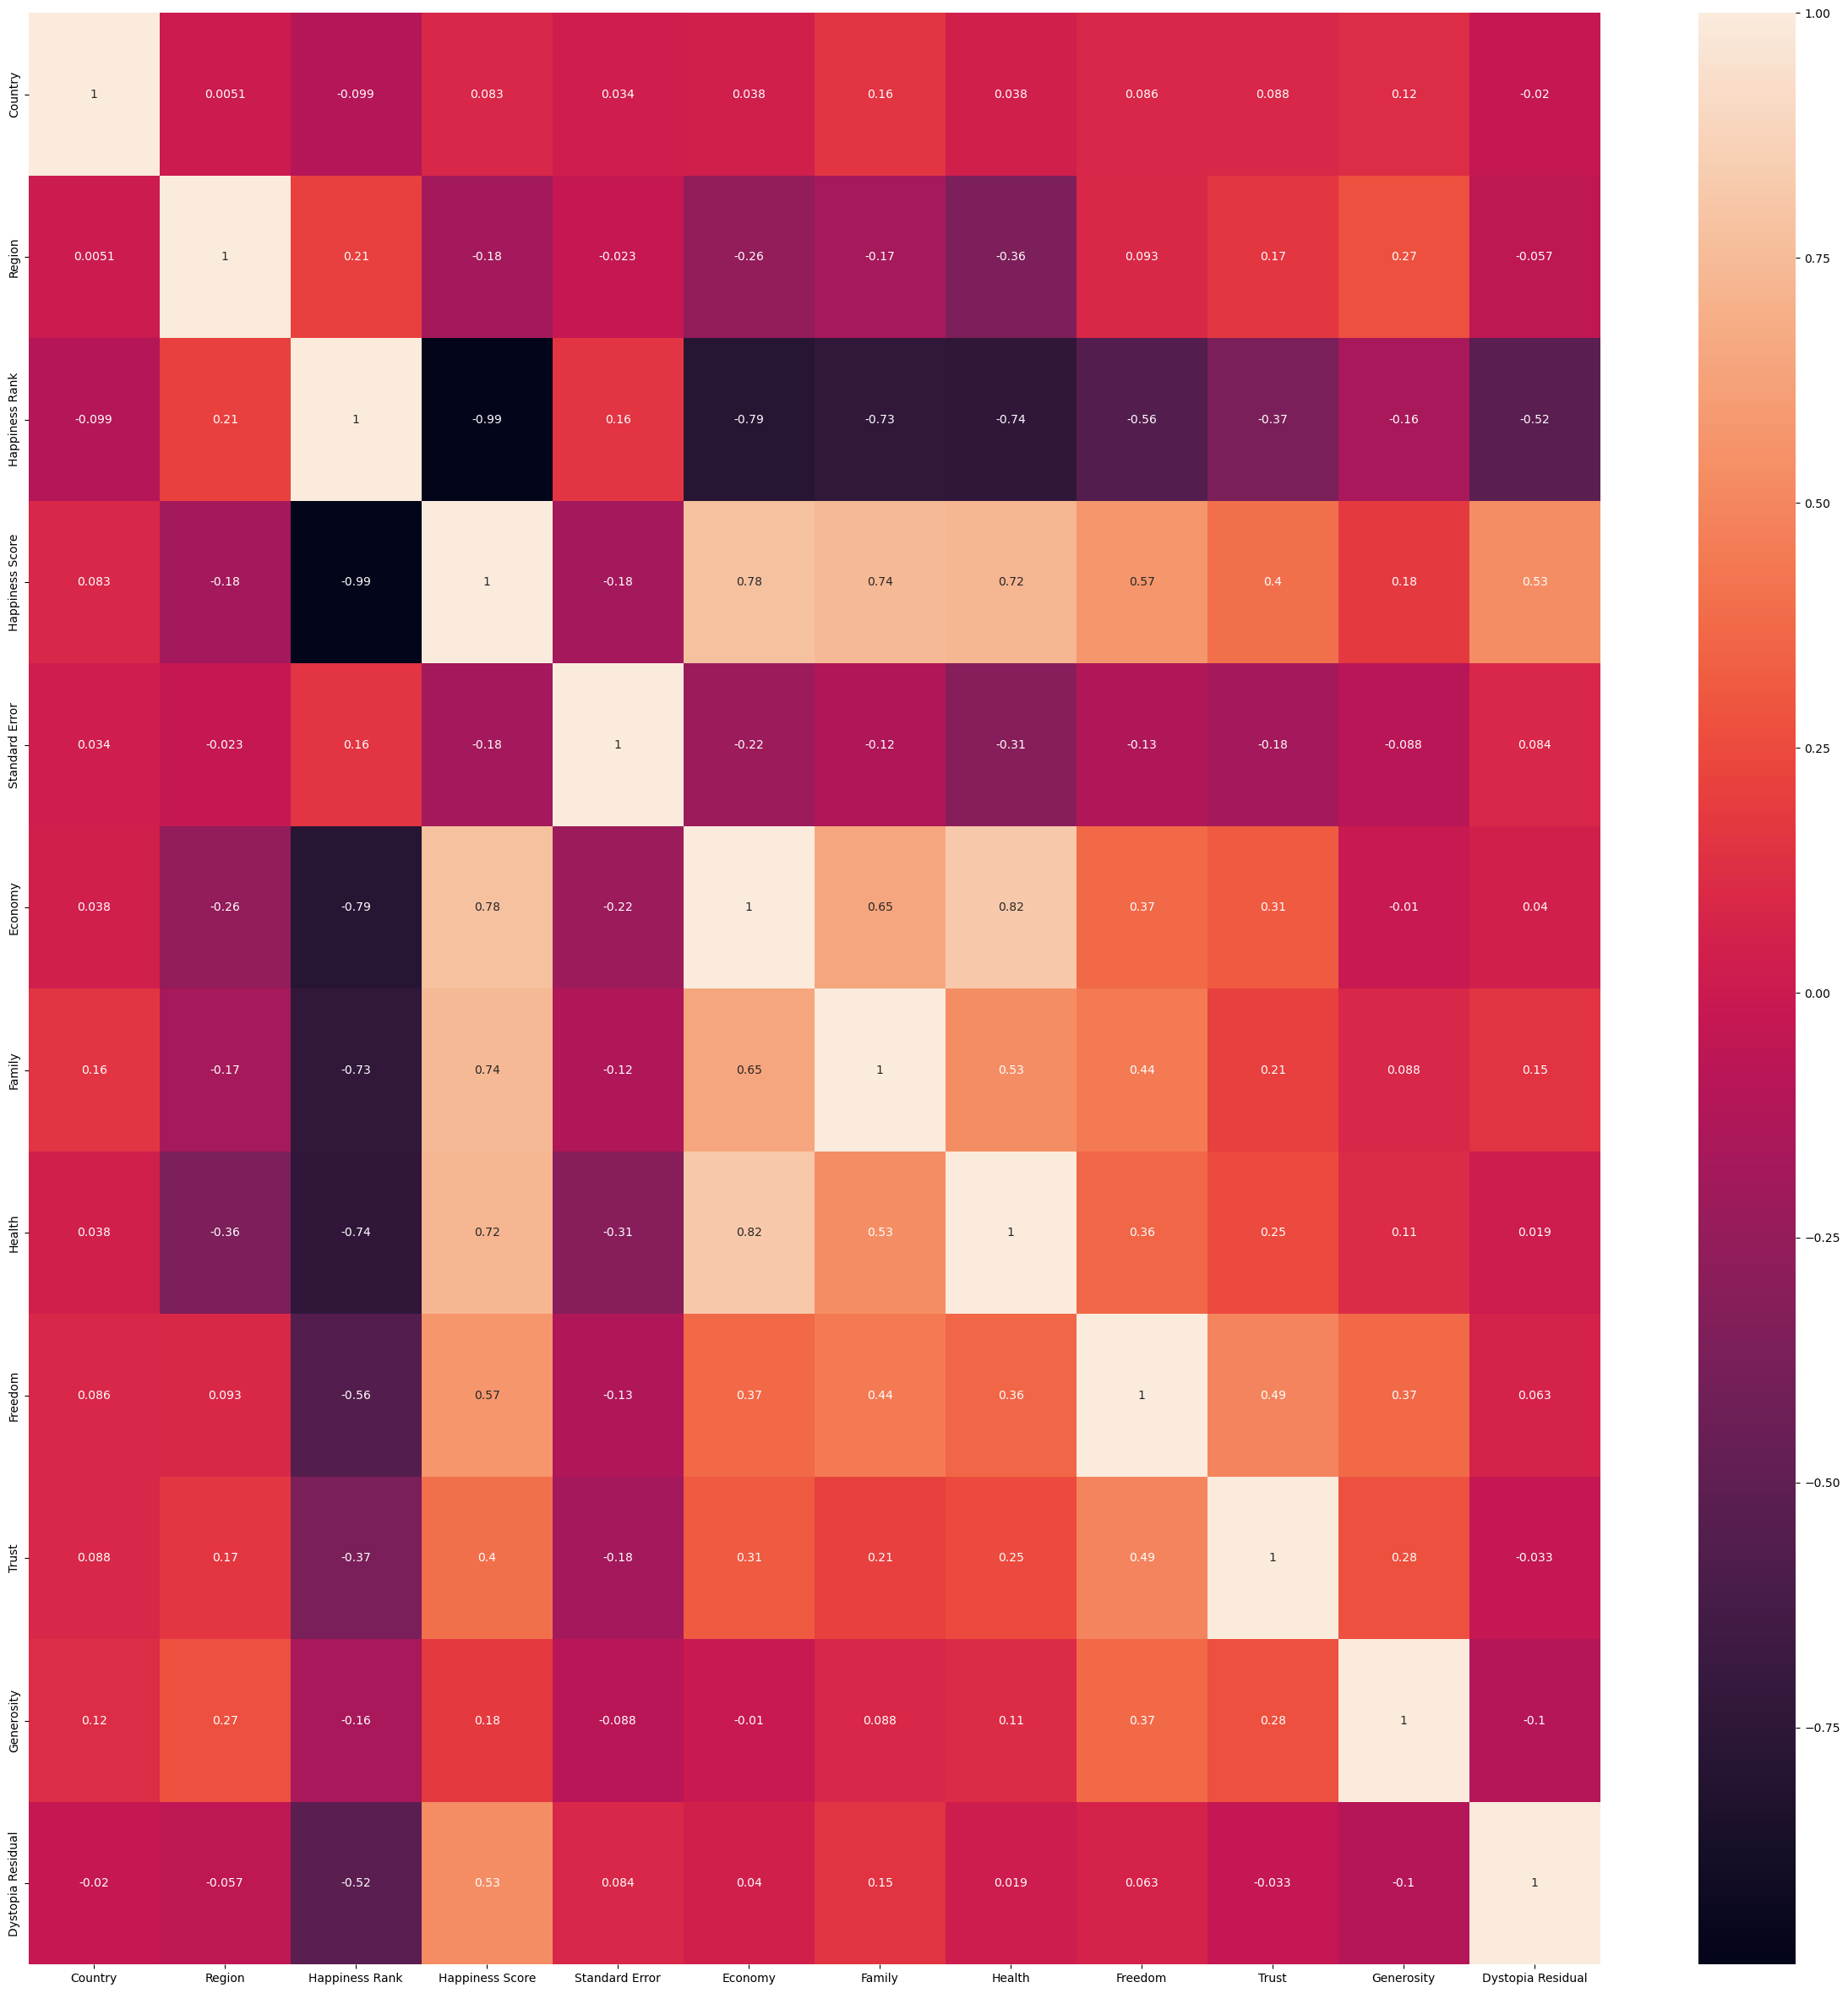

In [22]:
plt.figure(figsize=(30,30))
sns.heatmap(dfcor,color='k',annot=True)
#Happiness Score have strong relation with Family,Health,Freedom,Economy and Trust

In [23]:
dfcor['Happiness Score'].sort_values(ascending=False)

Happiness Score      1.000000
Economy              0.780966
Family               0.740605
Health               0.724200
Freedom              0.568211
Dystopia Residual    0.530474
Trust                0.395199
Generosity           0.180319
Country              0.083380
Region              -0.176791
Standard Error      -0.177254
Happiness Rank      -0.992105
Name: Happiness Score, dtype: float64

In [24]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

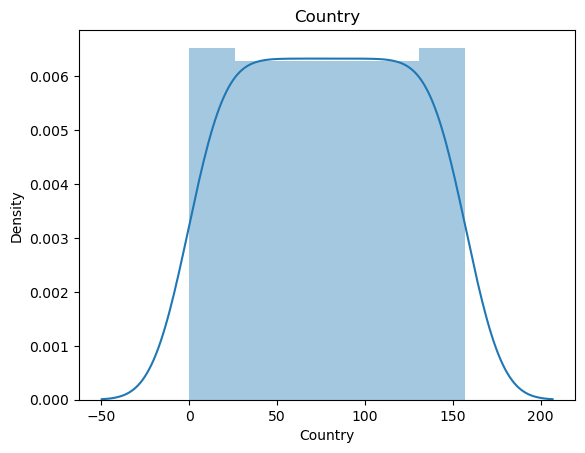

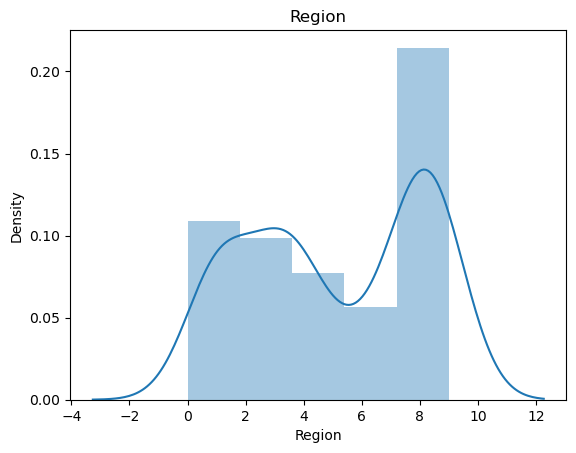

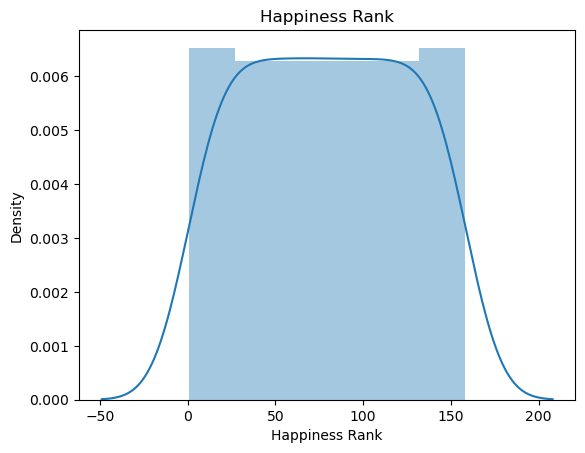

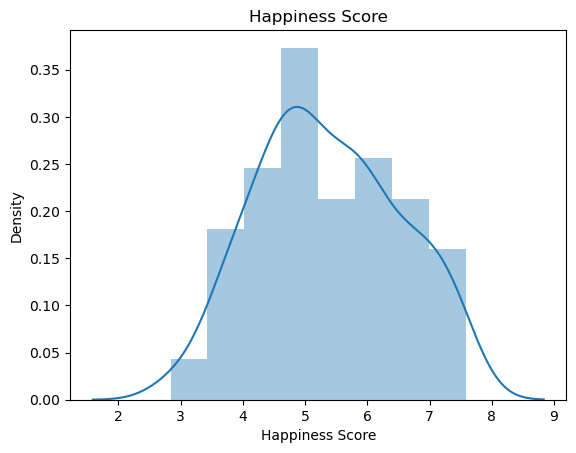

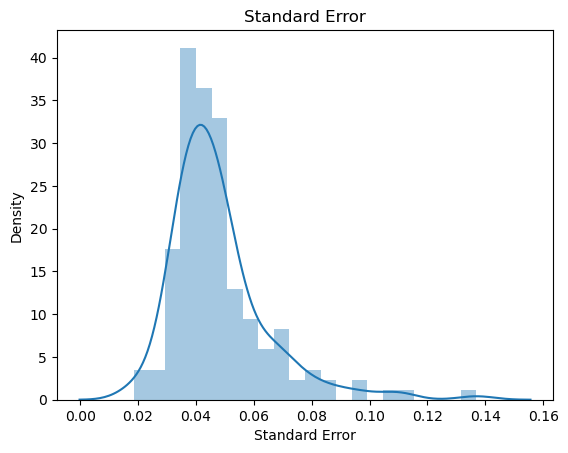

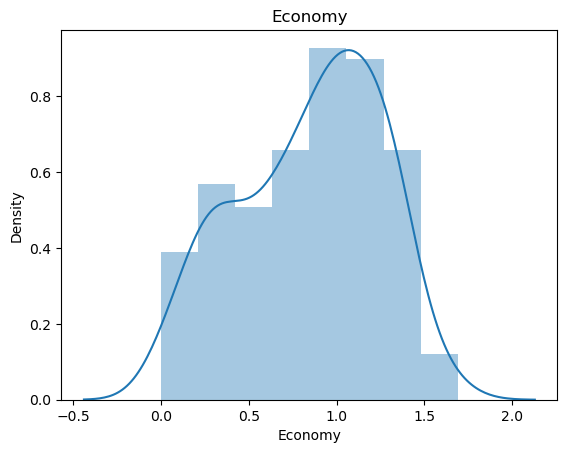

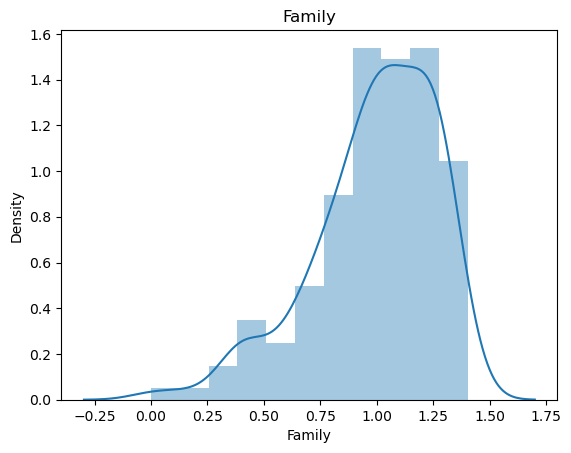

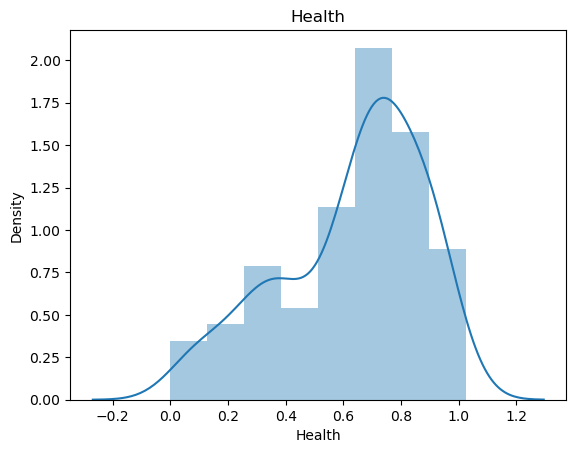

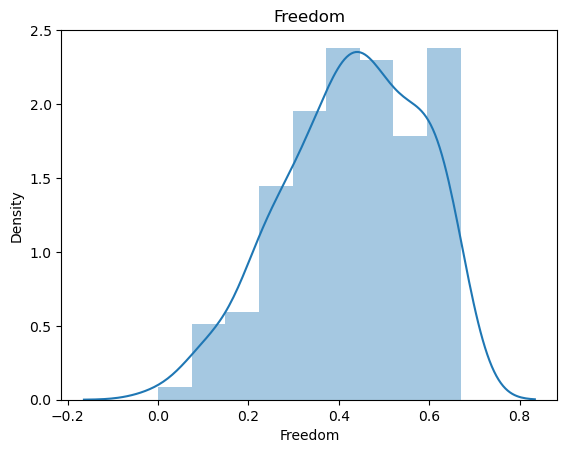

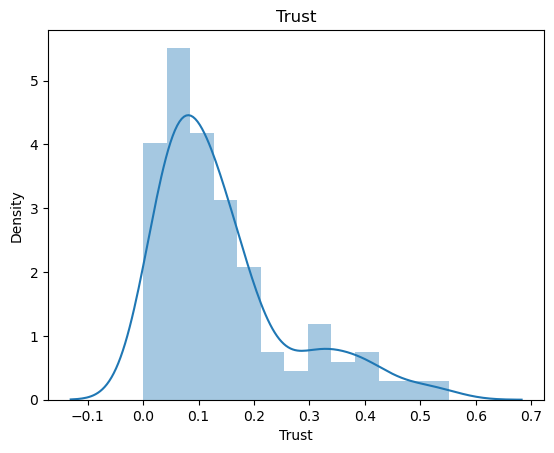

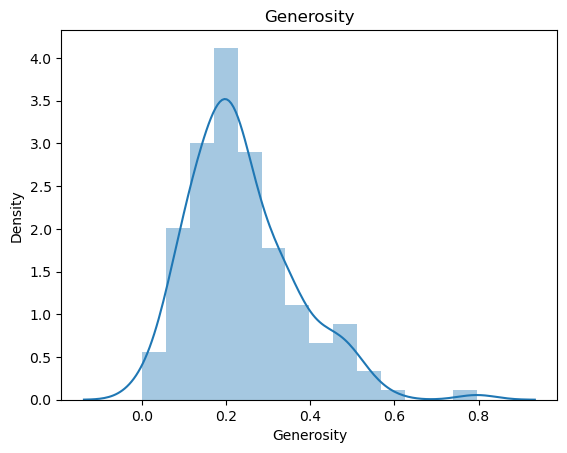

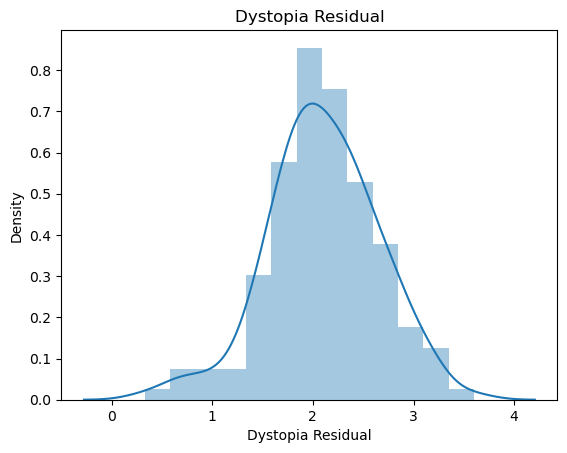

In [25]:
columns=df.columns.tolist()

for column in columns:
    sns.distplot(df[column])
    plt.title(column)
    plt.show()
#Distribution plot of every column

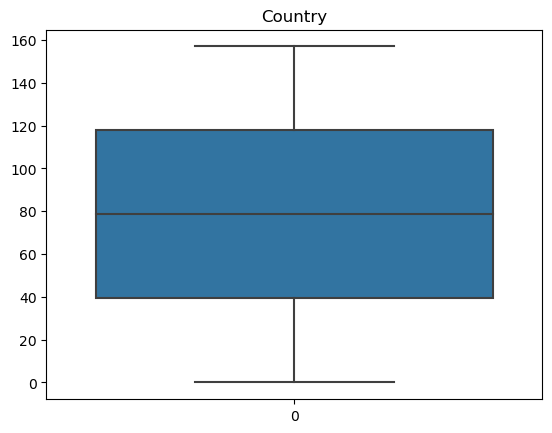

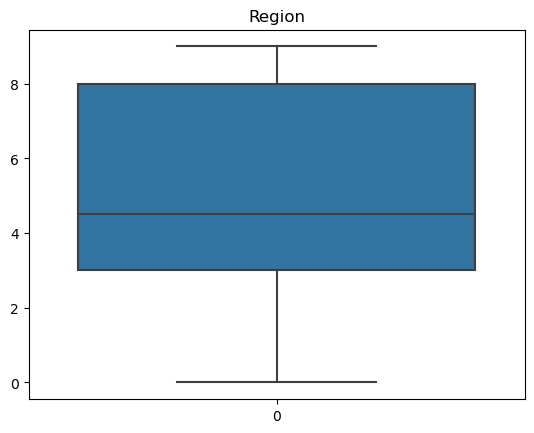

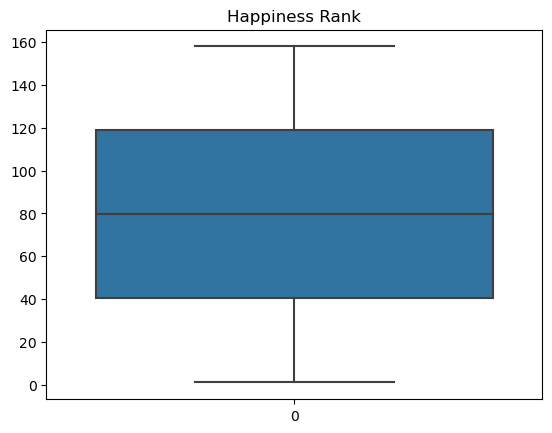

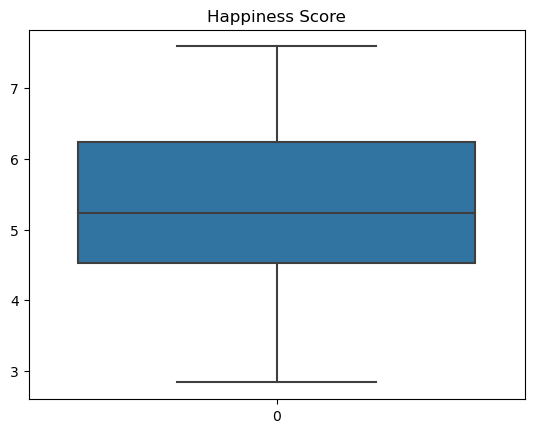

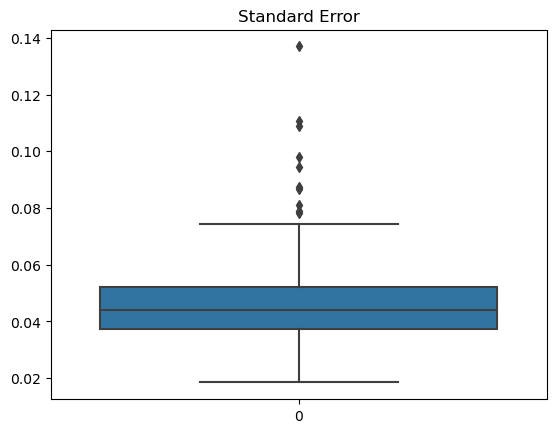

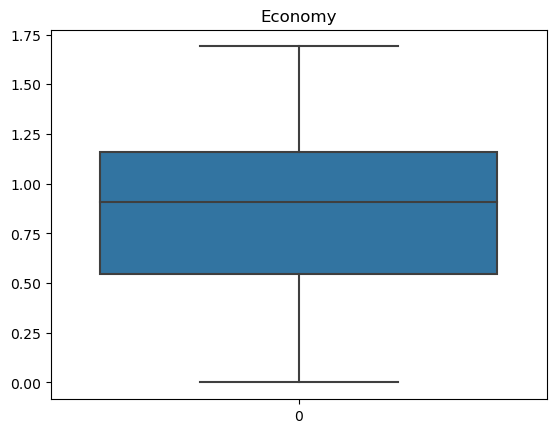

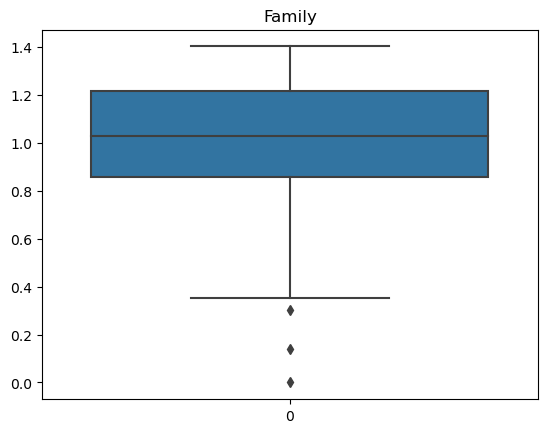

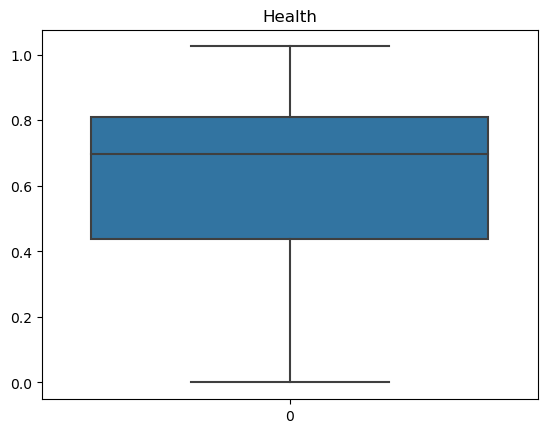

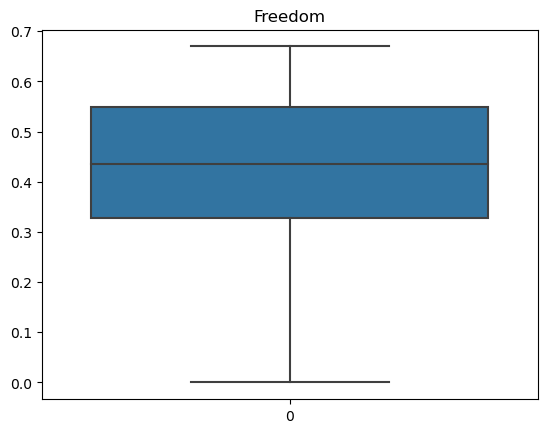

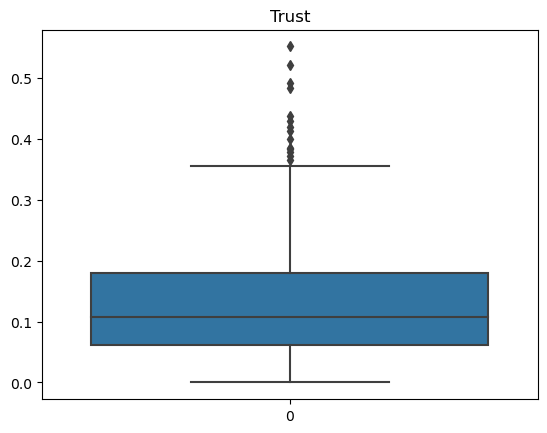

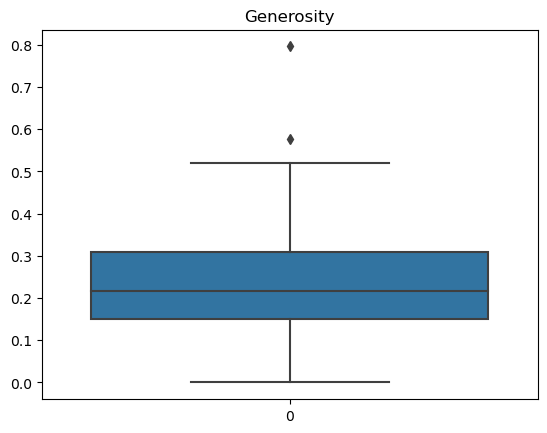

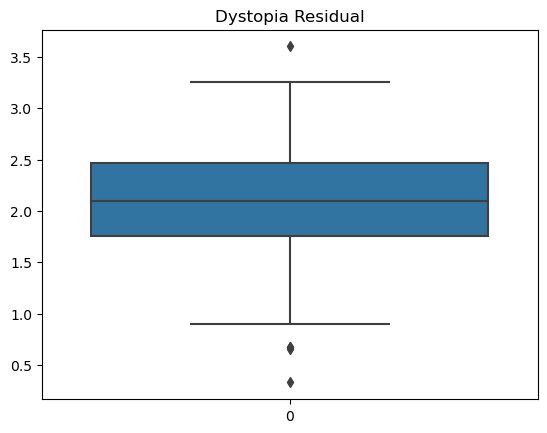

In [26]:
columns=df.columns.tolist()

for column in columns:
    sns.boxplot(df[column])
    plt.title(column)
    plt.show()
#Boxplot for every column

#As per the observation of a boxplot of different columns of dataset found out that multiple columns contain outliers that needs to be treated.

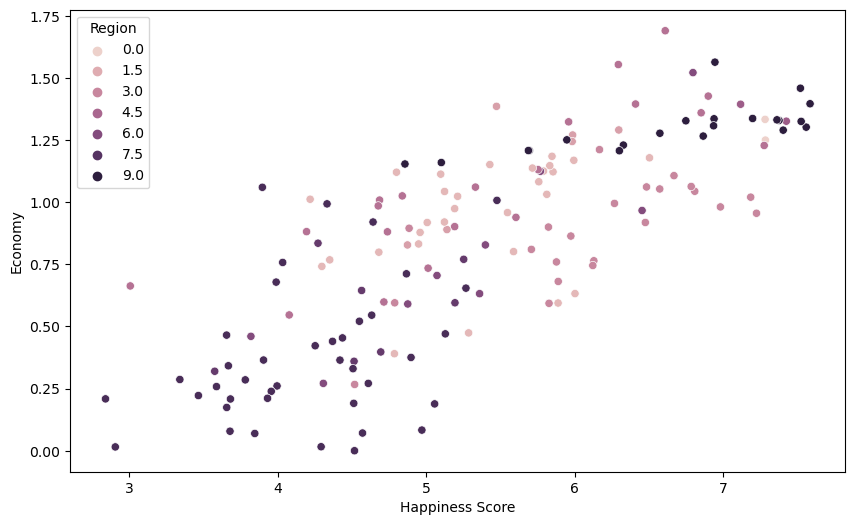

In [27]:
#Bivariate analysis

plt.figure(figsize=(10,6))
sns.scatterplot(x='Happiness Score',y='Economy',hue='Region',data=df)
plt.xlabel('Happiness Score')
plt.ylabel('Economy')
plt.show()

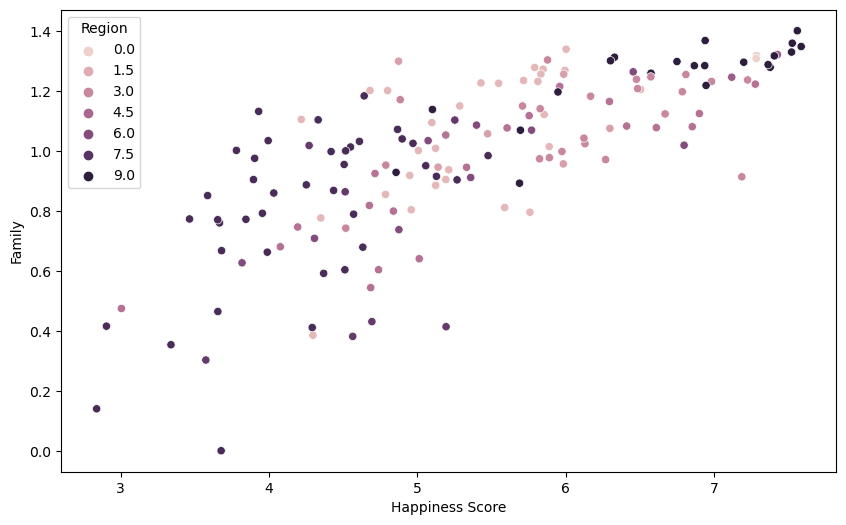

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Happiness Score',y='Family',hue='Region',data=df)
plt.xlabel('Happiness Score')
plt.ylabel('Family')
plt.show()

#Happiness score and the economy is directly proportional to each other as economy rises then happiness score also rises.

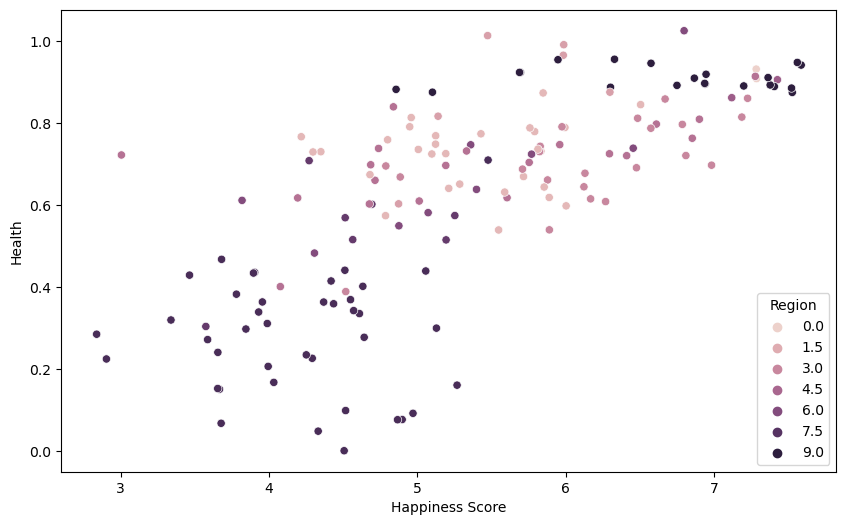

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Happiness Score',y='Health',hue='Region',data=df)
plt.xlabel('Happiness Score')
plt.ylabel('Health')
plt.show()

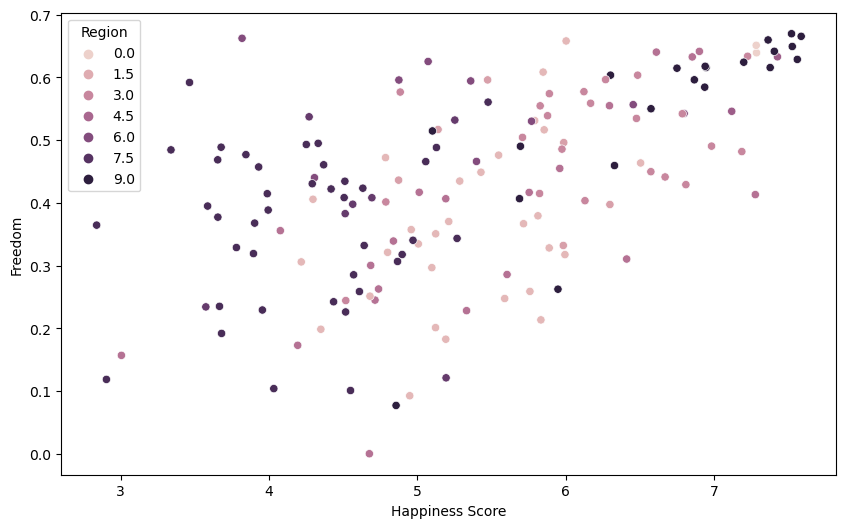

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Happiness Score',y='Freedom',hue='Region',data=df)
plt.xlabel('Happiness Score')
plt.ylabel('Freedom')
plt.show()

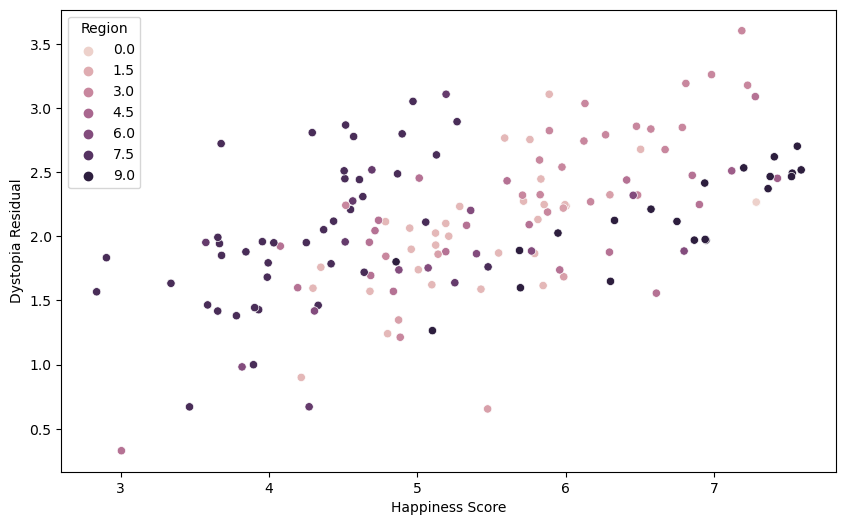

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Happiness Score',y='Dystopia Residual',hue='Region',data=df)
plt.xlabel('Happiness Score')
plt.ylabel('Dystopia Residual')
plt.show()

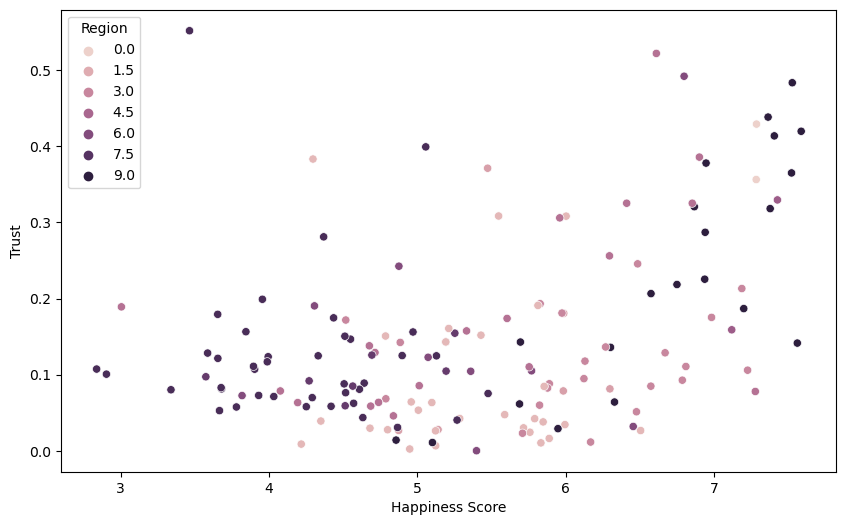

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Happiness Score',y='Trust',hue='Region',data=df)
plt.xlabel('Happiness Score')
plt.ylabel('Trust')
plt.show()

#Above scatterplots have strong relationship with the Happiness score

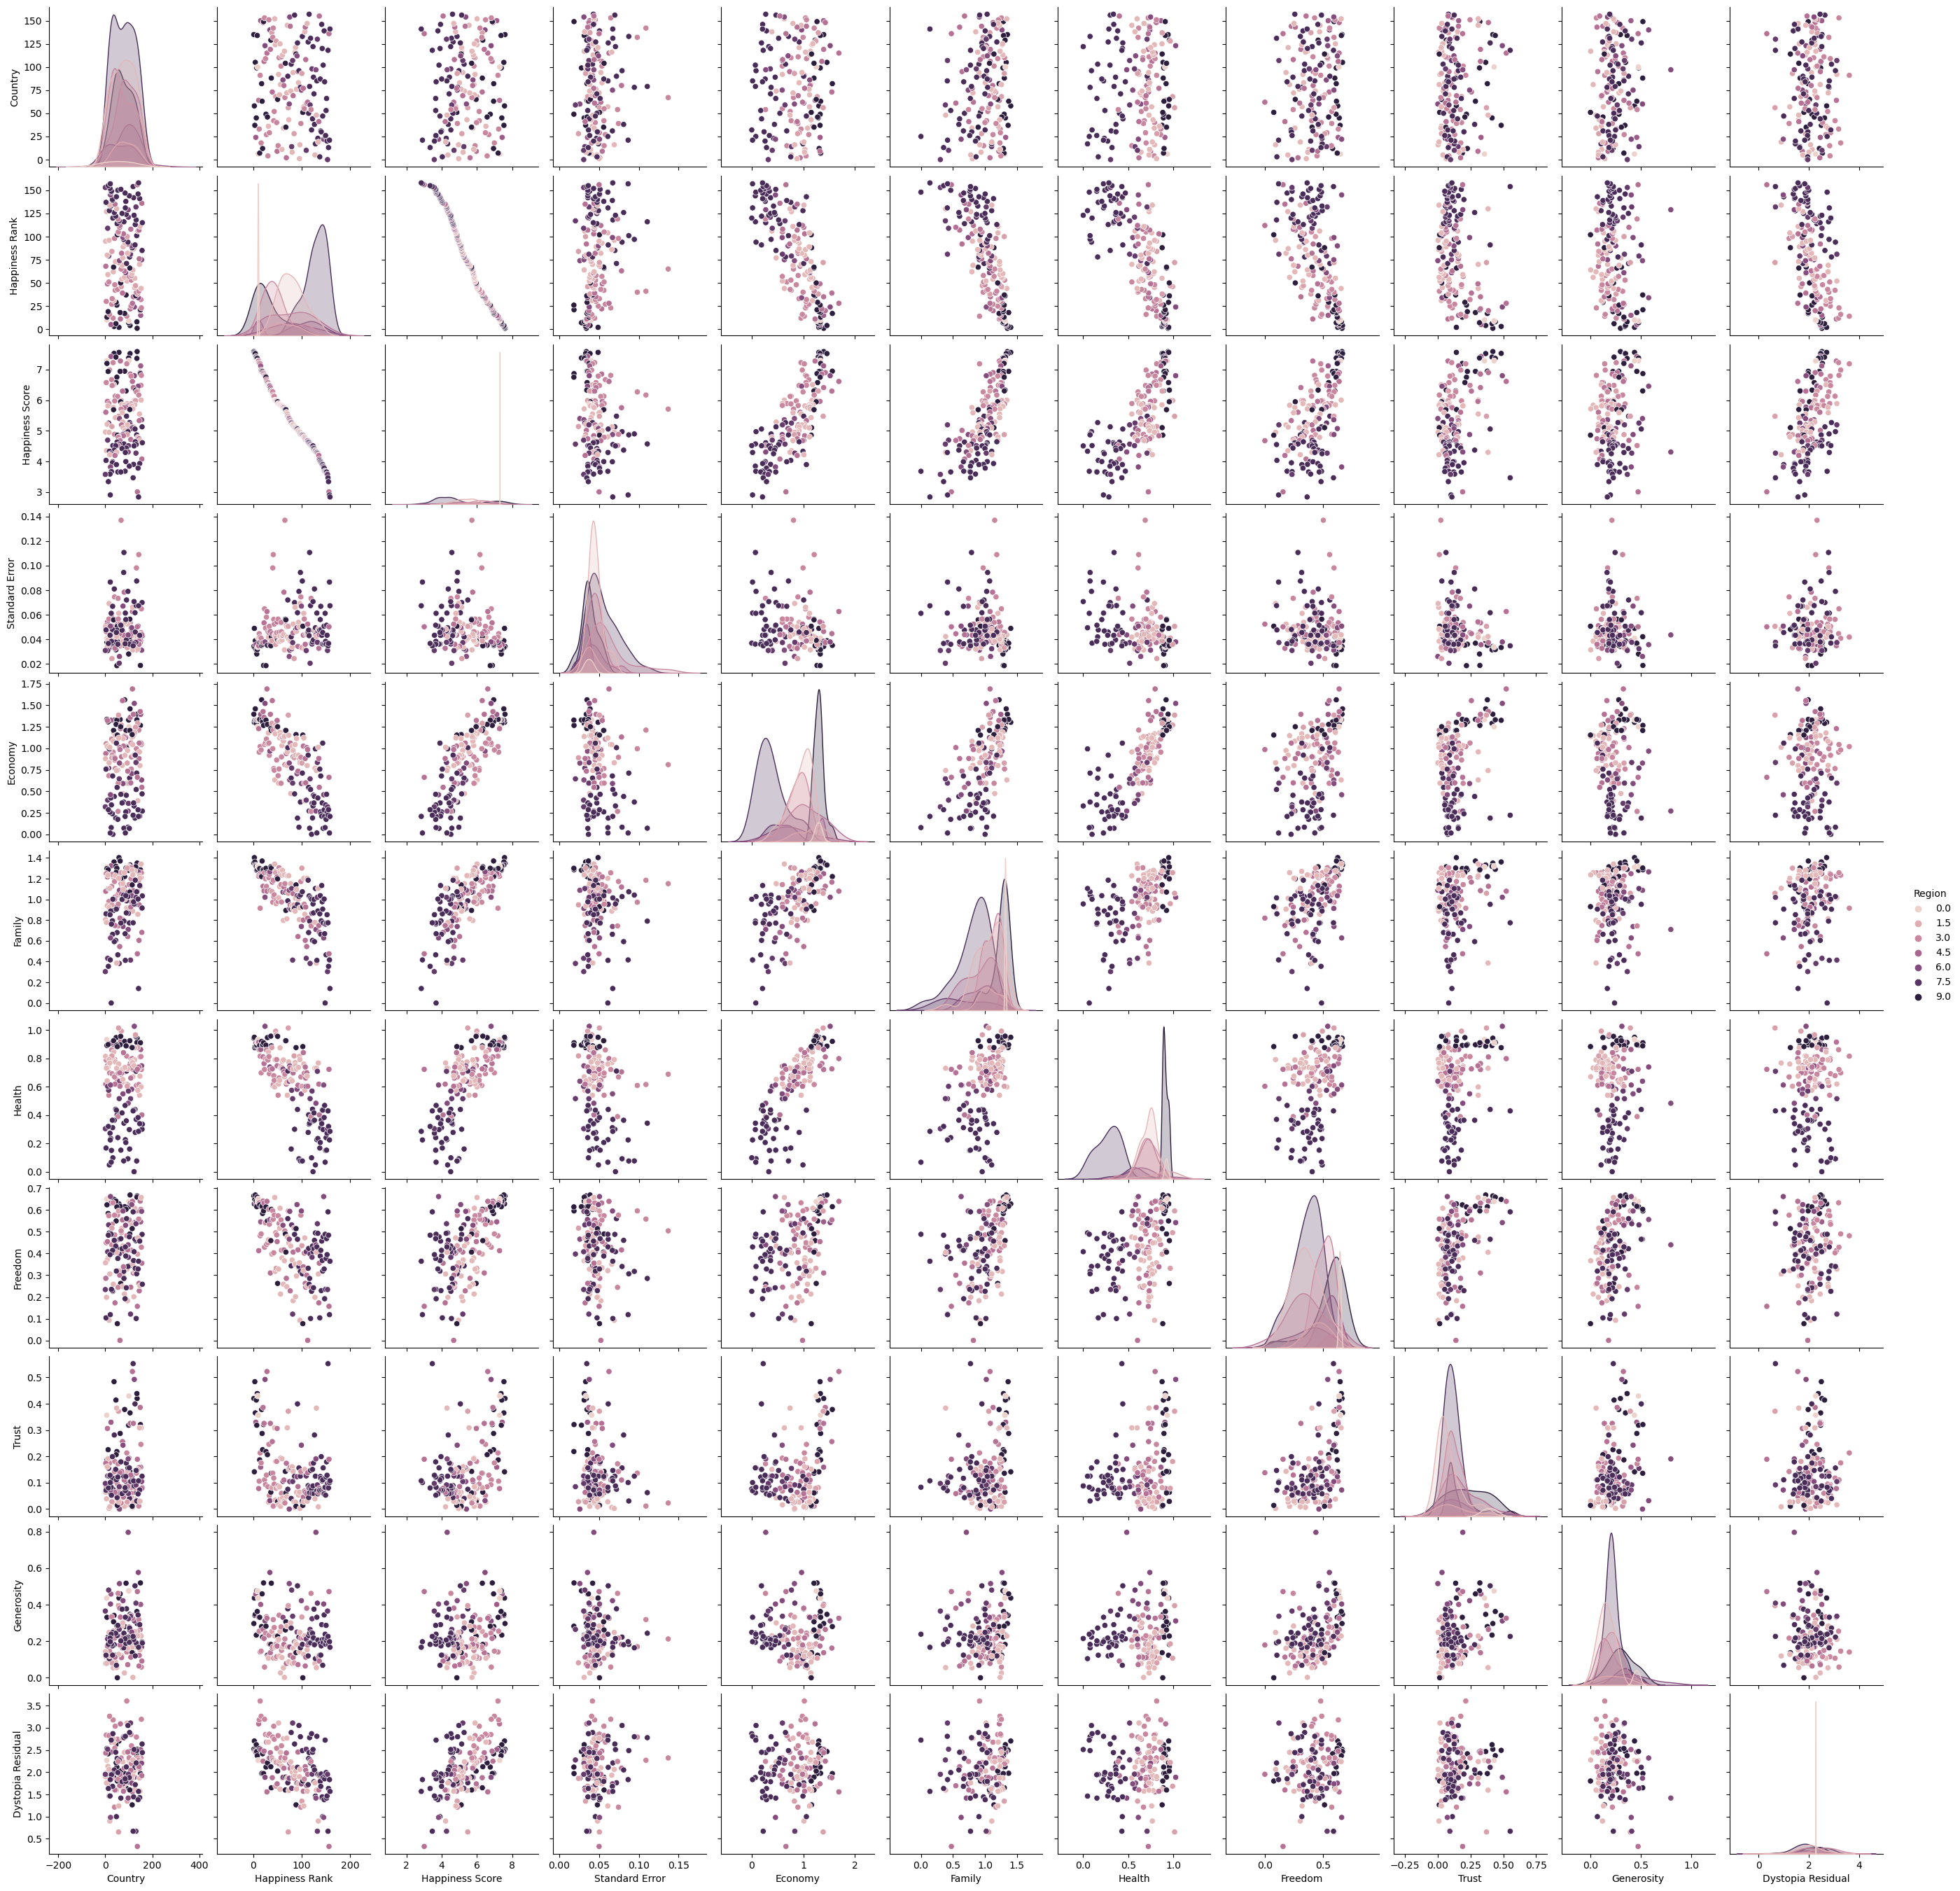

In [33]:
sns.pairplot(data=df,hue='Region')

In [34]:
z=np.abs(zscore(df))
z

Country    Region  Happiness Rank  Happiness Score  Standard Error  \
0    1.238770  1.300256        1.721000         1.937360        0.805926   
1    0.449465  1.300256        1.699075         1.914581        0.055889   
2    0.909893  1.300256        1.677149         1.884792        0.854487   
3    0.581016  1.300256        1.655224         1.880411        0.531526   
4    1.194920  0.040302        1.633299         1.797179        0.722845   
..        ...       ...             ...              ...             ...   
153  0.866043  0.965117        1.633576         1.674055        0.774917   
154  1.436096  0.965117        1.655501         1.783571        0.662582   
155  1.260695  0.375441        1.677427         2.076199        0.132534   
156  1.260695  0.965117        1.699352         2.164688        2.263962   
157  1.370321  0.965117        1.721277         2.222513        1.134182   

      Economy    Family    Health   Freedom     Trust  Generosity  \
0    1.369621  1.320281  1.263408  1.577438  2.309652    0.471040   
1    1.135226  1.514458  1.289434  1.332456  0.016480    1.575856   
2    1.192861  1.361054  0.992229  1.469659  2.842774    0.824293   
3    1.525130  1.251922  1.035145  1.605131  1.852081    0.868638   
4    1.194876  1.221204  1.118054  1.360416  1.555725    1.748563   
..        ...       ...       ...       ...       ...         ...   
153  1.552987  0.800520  0.818610  1.087740  3.413922    0.087228   
154  1.392303  2.346860  1.263362  0.372033  0.529210    0.433117   
155  0.455245  1.901086  0.372199  1.809238  0.381419    1.856891   
156  2.067566  2.118467  1.649648  2.064472  0.357715    0.316950   
157  1.586334  3.134725  1.404129  0.426621  0.301803    0.558153   

     Dystopia Residual  
0             0.758258  
1             1.092857  
2             0.712335  
3             0.663893  
4             0.639337  
..                 ...  
153           2.588925  
154           0.843967  
155           3.208430  
156           0.481985  
157           0.963612  

[158 rows x 12 columns]

In [35]:
threshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))


In [36]:
df_new=df[(z<3).all(axis=1)]

In [37]:
df.shape

(158, 12)

In [38]:
df_new.shape

(149, 12)

In [39]:
x=df_new.drop(['Happiness Score'],axis=1)
y=df_new['Happiness Score']

In [40]:
x.shape

(149, 11)

In [41]:
y.shape

(149,)

In [42]:
x.skew()

Country              0.048701
Region              -0.096985
Happiness Rank       0.003268
Standard Error       1.243048
Economy             -0.390657
Family              -0.811340
Health              -0.747711
Freedom             -0.400867
Trust                1.272530
Generosity           0.654710
Dystopia Residual   -0.021144
dtype: float64

In [43]:
Standard_Error=np.cbrt(df_new['Standard Error'])
Standard_Error.skew()

0.5283949780601277

In [44]:
Trust=np.cbrt(df_new['Trust'])
Trust.skew()

-0.06456779259930899

In [45]:
Generosity=np.sqrt(df_new['Generosity'])
Generosity.skew()

-0.2857985130797846

In [46]:
from scipy.stats import yeojohnson
df_new['Family'],lambda_=yeojohnson(df_new['Family'])

In [47]:
df_new['Family'].skew()

-0.14852767869463473

In [48]:
df_new['Health'],lambda_=yeojohnson(df_new['Health'])
df_new['Health'].skew()

-0.19066250358375267

In [49]:
from sklearn.preprocessing import power_transform

df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [50]:
x=df_new

In [51]:
x.skew()

Country             -0.267371
Region              -0.222589
Happiness Rank      -0.266578
Standard Error      -0.031216
Economy             -0.140644
Family              -0.148528
Health              -0.190663
Freedom             -0.076489
Trust                0.174593
Generosity           0.025172
Dystopia Residual    0.014748
dtype: float64

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


best_random_state=None
max_r2_score=-1

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=r2_score(y_test,predlr)
    if acc>max_r2_score:
        max_r2_score=acc
        best_random_state=i
    print('Best score is',max_r2_score,'on Random_state',best_random_state)
    print('\n')


Best score is 0.9972260548412899 on Random_state 0


Best score is 0.997717395518466 on Random_state 1


Best score is 0.997717395518466 on Random_state 1


Best score is 0.997717395518466 on Random_state 1


Best score is 0.997717395518466 on Random_state 1


Best score is 0.997717395518466 on Random_state 1


Best score is 0.997717395518466 on Random_state 1


Best score is 0.997717395518466 on Random_state 1


Best score is 0.997717395518466 on Random_state 1


Best score is 0.997717395518466 on Random_state 1


Best score is 0.997717395518466 on Random_state 1


Best score is 0.9978764168629396 on Random_state 11


Best score is 0.9978764168629396 on Random_state 11


Best score is 0.9978764168629396 on Random_state 11


Best score is 0.9978764168629396 on Random_state 11


Best score is 0.9982798867141596 on Random_state 15


Best score is 0.9982798867141596 on Random_state 15


Best score is 0.9982798867141596 on Random_state 15


Best score is 0.9982798867141596 on Random_state 

#Checking the Best Score and Random State

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=60)

In [54]:
x_train.shape

(99, 11)

In [55]:
y_train.shape

(99,)

In [56]:
x_test.shape

(50, 11)

In [57]:
y_test.shape

(50,)

In [58]:
from sklearn.metrics import mean_squared_error
lm=LinearRegression()
lm.fit(x_train,y_train)
lmpred=lm.predict(x_test)
print('Mean_Squared_Error:',mean_squared_error(y_test,lmpred))
print('R2_Score:',r2_score(y_test,lmpred))

Mean_Squared_Error: 0.0033056691430854413
R2_Score: 0.9973319652544771


In [59]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
print('Mean_Squared_Error:',mean_squared_error(y_test,preddtr))
print('R2_Score:',r2_score(y_test,preddtr))

Mean_Squared_Error: 0.011298400000000017
R2_Score: 0.9908809616256153


In [60]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
predknr=knr.predict(x_test)
print('Mean_Squared_Error:',mean_squared_error(y_test,predknr))
print('R2_Score:',r2_score(y_test,predknr))

Mean_Squared_Error: 0.10899224480000007
R2_Score: 0.9120313971145003


In [61]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
predsvr=svr.predict(x_test)
print('Mean_Squared_Error:',mean_squared_error(y_test,predsvr))
print('R2_Score:',r2_score(y_test,predsvr))

Mean_Squared_Error: 0.045405129810562724
R2_Score: 0.9633531189251187


In [62]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
predrfr=rfr.predict(x_test)
print('Mean_Squared_Error:',mean_squared_error(y_test,predrfr))
print('R2_Score:',r2_score(y_test,predrfr))

Mean_Squared_Error: 0.006012113460000017
R2_Score: 0.9951475701556951


In [63]:
from sklearn.ensemble import AdaBoostRegressor
adr=AdaBoostRegressor()
adr.fit(x_train,y_train)
predadr=adr.predict(x_test)
print('Mean_Squared_Error:',mean_squared_error(y_test,predadr))
print('R2_Score:',r2_score(y_test,predadr))

Mean_Squared_Error: 0.014336234846870664
R2_Score: 0.9884290983048215


In [64]:
from sklearn.model_selection import cross_val_score
lmscores=cross_val_score(lm,x_train,y_train,cv=5)
print(lmscores)
print(lmscores.mean(),lmscores.std())

[0.99566506 0.99452109 0.99035961 0.9944166  0.98505344]
0.9920031606109317 0.003913413227411246


In [65]:
dtrscores=cross_val_score(dtr,x_train,y_train,cv=5)
print(dtrscores)
print(dtrscores.mean(),dtrscores.std())

[0.99436077 0.99202704 0.97405707 0.98712052 0.97604906]
0.984722892012851 0.00825812238095356


In [66]:
knrscores=cross_val_score(knr,x_train,y_train,cv=5)
print(knrscores)
print(knrscores.mean(),knrscores.std())

[0.89655178 0.91768128 0.91952937 0.86586668 0.83079094]
0.8860840094749293 0.033742011815493626


In [67]:
svrscores=cross_val_score(svr,x_train,y_train,cv=5)
print(svrscores)
print(svrscores.mean(),svrscores.std())

[0.87566865 0.95660797 0.91629479 0.93147352 0.95283718]
0.9265764211539622 0.02936942895101301


In [68]:
rfrscores=cross_val_score(rfr,x_train,y_train,cv=5)
print(rfrscores)
print(rfrscores.mean(),rfrscores.std())

[0.99463989 0.99301462 0.98296307 0.99526504 0.99377301]
0.99193112500209 0.004548513110689123


In [69]:
adrscores=cross_val_score(adr,x_train,y_train,cv=5)
print(adrscores)
print(adrscores.mean(),adrscores.std())

[0.99054532 0.98949667 0.9804129  0.99019621 0.98944929]
0.9880200785822281 0.00382634399329947


In [70]:
from sklearn.model_selection import GridSearchCV
adr=AdaBoostRegressor()

params={'n_estimators':[50,100,200],'learning_rate':[0.01,0.1,1],'base_estimator':[DecisionTreeRegressor(max_depth=3)]}

clf=GridSearchCV(adr,param_grid=params,cv=5)
clf.fit(x_train,y_train)

print('Best Parameters:',clf.best_params_)
print('Cross_validation_Score:',clf.best_score_)

Best Parameters: {'base_estimator': DecisionTreeRegressor(max_depth=3), 'learning_rate': 1, 'n_estimators': 200}
Cross_validation_Score: 0.9903643955954651


In [71]:
adr = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), learning_rate=1, n_estimators=200)
adr.fit(x_train,y_train)
adr.score(x_train,y_train)
predadr=adr.predict(x_test)
print('R2_score',r2_score(y_test,predadr)*100)

R2_score 98.78773653901624


In [72]:
import pickle
filename='adr.pkl'
pickle.dump(adr,open(filename,'wb'))